
# <p style="text-align: center;">EE 461P: Data Science Principles</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 55</p>
## <p style="text-align: center;">Due: Thur, October 3rd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Ridge and Lasso Regression (15 points)
Use the following codes to import the diabetes dataset.

In [1]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

The dataset consists of ten features and one target variable.  More information is found at http://scikit-learn.org/stable/datasets/index.html#diabetes-dataset

After importing the datasets, use the following code to add additional second-order polynomial and interaction variables to the features matrix.  You should have 65 variables and one target variable. Note that this code adds all combinations of the features with degree less than or equal to two; in practice one may introduce only a few based on domain knowledge or experimentation.

In [2]:
from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(2, include_bias=False).fit_transform(X)

In this question, you will explore the application of Lasso and Ridge regression using sklearn package in Python. The following code will split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 20** and **test_size = 0.33**.  Note: lambda is called alpha in sklearn.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=20)

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MSE as the scoring metric. (5pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot (e.g. Fig 6.6 of JW). What do you qualitatively observe when value of the regularization parameter is changed? (4pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MSE) on the test data for each. (3pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for 65 variables. What do you observe from these coefficients? (3pts)

## Answer

### (1)

In [4]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n_folds = 5
kf = KFold(n_splits=n_folds)
lasso_alphas =  10**np.linspace(10,-2,100)*0.5
lasso_avg_rmse = {}

for alpha in lasso_alphas:
    lasso = linear_model.Lasso(alpha=alpha)
    avg_mse = 0
    for k, (train, test) in enumerate(kf.split(X_train, y_train)):
        lasso.fit(X_train[train], y_train[train])
        avg_mse = avg_mse + mean_squared_error(y_train[test], lasso.predict(X_train[test])) 
    lasso_avg_rmse[alpha] = avg_mse / n_folds
best_alpha_lasso = min(lasso_avg_rmse, key=lasso_avg_rmse.get)
print("Best lasso alpha: {}".format(best_alpha_lasso))


ridge_alphas =  10**np.linspace(10,-2,100)*0.5
ridge_avg_rmse = {}

for alpha in ridge_alphas:
    ridge = linear_model.Ridge(alpha=alpha)
    avg_mse = 0
    for k, (train, test) in enumerate(kf.split(X_train, y_train)):
        ridge.fit(X_train[train], y_train[train])
        avg_mse = avg_mse + mean_squared_error(y_train[test], ridge.predict(X_train[test])) 
    ridge_avg_rmse[alpha] = avg_mse / n_folds
best_alpha_ridge = min(ridge_avg_rmse, key=ridge_avg_rmse.get)
print("Best ridge alpha: {}".format(best_alpha_ridge))

Best lasso alpha: 0.008737642000038414
Best ridge alpha: 0.005


### (2)

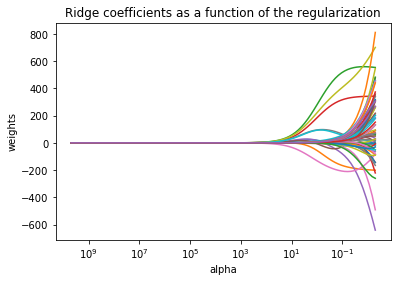

In [5]:
alphas = 10**np.linspace(10,-2,100)*0.5

ridge = linear_model.Ridge(alpha=alpha)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

plt.figure()
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');

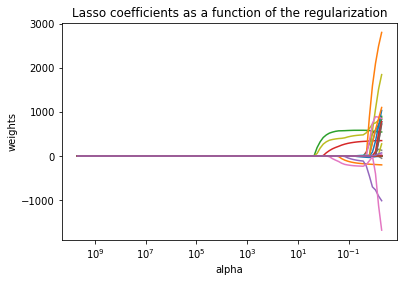

In [6]:
alphas = 10**np.linspace(10,-2,100)*0.5

lasso = linear_model.Lasso(alpha=alpha)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

plt.figure()
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization');

### (3)

In [7]:
#%% (3) - train and test MSE
linear_clf = linear_model.LinearRegression()
ridge_clf = linear_model.Ridge(alpha=best_alpha_ridge)
lasso_clf = linear_model.Lasso(alpha=best_alpha_lasso)

def fit_reg(model, name):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(pred, y_test)
    print("MSE for {0}: {1}".format(name, mse))

fit_reg(linear_clf, "linear")
fit_reg(ridge_clf, "ridge")
fit_reg(lasso_clf, "lasso")

MSE for linear: 3501.51672513134
MSE for ridge: 2946.794770721218
MSE for lasso: 2961.4375901194862


### (4)

In [8]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=10000)
lassocv.fit(X_train, y_train)
print(lassocv.alpha_)

0.00642100472994


In [9]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
print(mean_squared_error(y_test, lasso.predict(X_test)))

2971.81006562


In [10]:
print(lasso.coef_)

[   -6.41033505  -197.57695949   546.9846375    348.23882294  -920.20114717
   726.91383711    31.98462597   -14.80954929   817.15834216     5.94086981
     0.          2527.81172745     0.             0.             0.            -0.
     0.             0.          1554.85141873    -0.            -0.             0.
   496.50450943     0.             0.             0.         -1188.61168992
     0.             0.           664.16443725   724.09506593     0.             0.
     0.             0.             0.           875.45007512   151.45850921
    66.59384692     0.           374.64761997    -0.             0.            -0.
     0.             0.             0.            -0.             0.             0.
    -0.            -0.            -0.           546.68065867     0.
   369.98354682    -0.             0.             0.            -0.            -0.
   875.26885833    -0.             0.            54.6764378 ]


Some of the coefficients are now reduced to exactly zero.

# Question 2  (5 pts)

A regression model that includes "interaction terms" (i.e. quadratic terms of the form $x_ix_j$) as predictors in addition to the linear terms is clearly more general than a corresponding model that employs the same independent variables but only uses the linear terms. Outline two situations where the simpler (less general) model would be preferred to the more powerful model that includes interactive terms.

## Answer

Adding interaction terms may lead to following problems.

- The model may become excessively complex given data sets of limited size, which may lead to over-fitting.
- Expensive computation if the data set is large.
- Interaction terms and coefficients may be harder to interpret.



# Question 3 - Bias-variance Trandeoff (2pts)
How does the choice of K in the K-nearest neighbor classifier reflect a bias-variance tradeoff?

## Answer
When K = 1, the decision boundary of K-nearest neighbor classifier is overly flexible and this corresponds to a classifier that has low bias but very high variance. As K grows, the method becomes less flexible and produces a decision boundary that is close to linear. This corresponds to a low-variance but high-bias classifier. 

# Question 4: Data Exploration and Regression Analysis (3+3+3+3+3=15pts)

Consider the dataset provided (russett_inequality_full.csv) about agricultural inequality, industrial development and political instability in different countries. More information about it can be found [here](https://www.rdocumentation.org/packages/plspm/versions/0.4.9/topics/russett) though the data itself is slightly different than that referenced in the link.

a) (4 points) Generate box-plots of the "rent" (% of farmers that rent all their land) and "demo_score" ( derived measure of the level of a country's democracy from 1945 to 61 ) and identify the cutoff values for outliers. 

Generate 2 scatterplots of "rent" against "demo_score", and "inst" against "demo_score" with the identified outliers colored differently than non-outliers in each; comment on how inclusion of the outliers would affect a predictive model for the "demo_score" response.  

b) (3 points) Let us try to fit an MLR, using ordinary least squares, to this dataset with "demo_score" as the dependent variable using only the predictors 'rent','inst', and 'ecks' . 

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=10)   

Report the RMSE obtained on both X_train and X_test. How much does this increase when you score your model on X_test?

c) (4 points ) Try to predict ”demo_score” using a robust regression using Huber loss.  You can use the [sklearn package](  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html).  Set regularization parameter alpha to 0.0 and all other parameters as default.
Report RMSE obtained on both X_train and X_test.

d) (4 points ) Compare and comment on the model fits obtained in (b) and (c) and plot the residual plots using all data for each model. How do outliers affect the relative performance of ordinary least squares regression, and robust regression with Huber loss in general? 

## Answer

(a)

In [24]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
%matplotlib inline  
Russett = pd.read_csv("./russett_full_v2.csv")    

In [12]:
print(Russett.shape)
Russett.head()

(47, 11)


,country,gini,farm,rent,gnpr,labo,inst,ecks,death,demo_class,demo_score
0,Argentina,86.3,98.2,47.9,374,25,16.6,47.0,217,2,35
1,Australia,92.9,99.6,30.0,1215,14,19.3,0.0,0,1,89
2,Austria,74.0,97.4,25.7,532,32,15.8,4.0,0,2,52
3,Belgium,58.7,85.8,98.3,1015,10,23.5,8.0,1,1,98
4,Bolivia,93.8,97.7,35.0,66,72,18.3,43.0,663,3,19


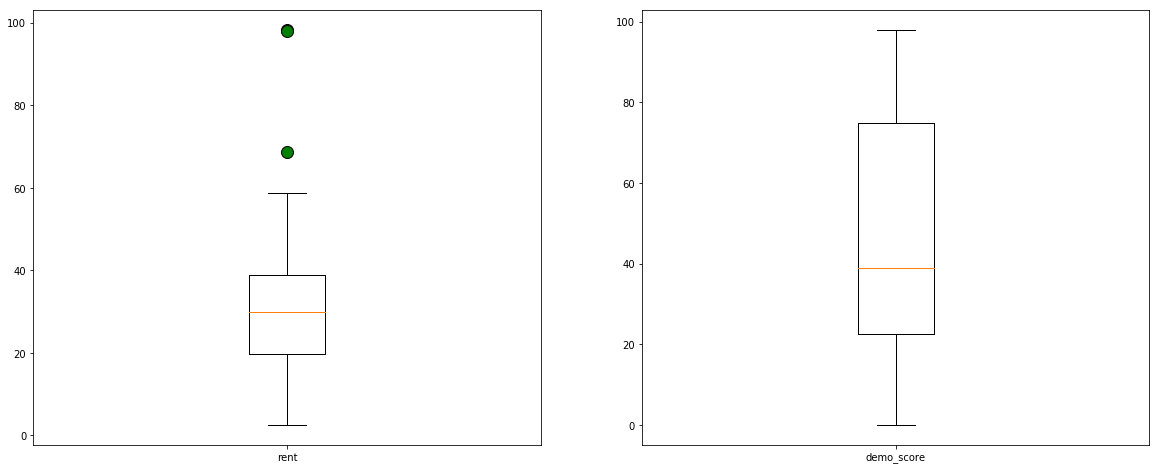

In [13]:
flierprops = dict(marker='o', markerfacecolor='green', markersize=12, linestyle='none')

cols = ["rent","demo_score"]
x = len(cols)
plt.subplots(x,1, figsize = (20,8))
for i in range(x):
    c = cols[i]
    ax1 = plt.subplot(1,x,i+1)
    plt.boxplot(Russett[c],flierprops=flierprops)
    ax1.set_xticklabels([c])

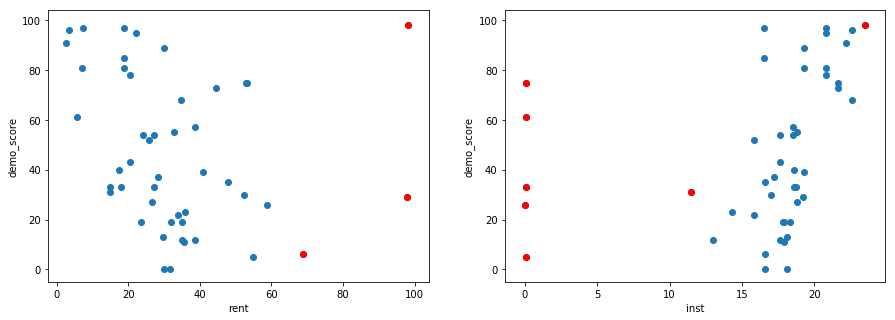

In [14]:
resp = "demo_score"
pred = "rent"
pred_Q75 = Russett[pred].quantile(0.75)
pred_Q25 = Russett[pred].quantile(0.25)
pred_IQR = pred_Q75 - pred_Q25
upper_outlier_pred = pred_Q75 + 1.5*pred_IQR
lower_outlier_pred = pred_Q25 - 1.5*pred_IQR

resp_Q75 = Russett[resp].quantile(0.75)
resp_Q25 = Russett[resp].quantile(0.25)
resp_IQR = resp_Q75 - resp_Q25
upper_outlier_resp = resp_Q75 + 1.5*resp_IQR
lower_outlier_resp = resp_Q25 - 1.5*resp_IQR

plt.subplots(2,1, figsize=(15,5))
ax1 = plt.subplot(1,2,1)
plt.scatter(Russett[pred],Russett[resp])
plt.hold
outlier = Russett[(Russett[pred]<lower_outlier_pred) | (Russett[pred]>upper_outlier_pred)| (Russett[resp]>upper_outlier_resp) | (Russett[resp]<lower_outlier_resp)]
plt.scatter(outlier[pred], outlier[resp], color = 'red')  
plt.xlabel(pred)
plt.ylabel(resp)

pred = "inst"
pred_Q75 = Russett[pred].quantile(0.75)
pred_Q25 = Russett[pred].quantile(0.25)
pred_IQR = pred_Q75 - pred_Q25
upper_outlier_pred = pred_Q75 + 1.5*pred_IQR
lower_outlier_pred = pred_Q25 - 1.5*pred_IQR

ax2 = plt.subplot(1,2,2)
plt.scatter(Russett[pred],Russett[resp])
plt.hold
outlier = Russett[(Russett[pred]<lower_outlier_pred) | (Russett[pred]>upper_outlier_pred)| (Russett[resp]>upper_outlier_resp) | (Russett[resp]<lower_outlier_resp)]
plt.scatter(outlier[pred], outlier[resp], color = 'red')  
plt.xlabel(pred)
plt.ylabel(resp)


Cutoffs for identifying outliers can be determined by calculating Q1 − 1.5 ∗ IQR and Q3 + 1.5 ∗ IQR, where Q1 and Q3 are the first and third quartile, respectively, and IQR = Q3 − Q1 is the interquartile range.
Inclusion of the outliers can bias models such as linear regressions (OLS). In this example the bias is largely due to the outliers with higher "rent" and lower "intst" values.

(b)

In [15]:
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

X = Russett[['rent','inst','ecks']]
y = Russett['demo_score']

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=10)

# Linear regression
lin = LinearRegression()
lin.fit(X_train, y_train)

print('Linear regression (OLS) train error: {} ' .format(np.sqrt(mean_squared_error(lin.predict(X_train), y_train))))
print('Linear regression (OLS) test error: {} ' .format(np.sqrt(mean_squared_error(lin.predict(X_test), y_test))))
print("RMSE increase: {}".format(np.sqrt(mean_squared_error(lin.predict(X_test), y_test)) - np.sqrt(mean_squared_error(lin.predict(X_train), y_train))))


Linear regression (OLS) train error: 25.55900184499996 
Linear regression (OLS) test error: 33.501251806077235 
RMSE increase: 7.942249961077277


(c)

In [16]:
huber = HuberRegressor(alpha = 0.0)
huber.fit(X_train, y_train)

print('Linear regression (Huber loss) train error: {} ' .format(np.sqrt(mean_squared_error(huber.predict(X_train), y_train))))
print('Linear regression (Huber loss) test error: {} ' .format(np.sqrt(mean_squared_error(huber.predict(X_test), y_test))))


Linear regression (Huber loss) train error: 26.433905522940368 
Linear regression (Huber loss) test error: 30.95435264029106 


(d)

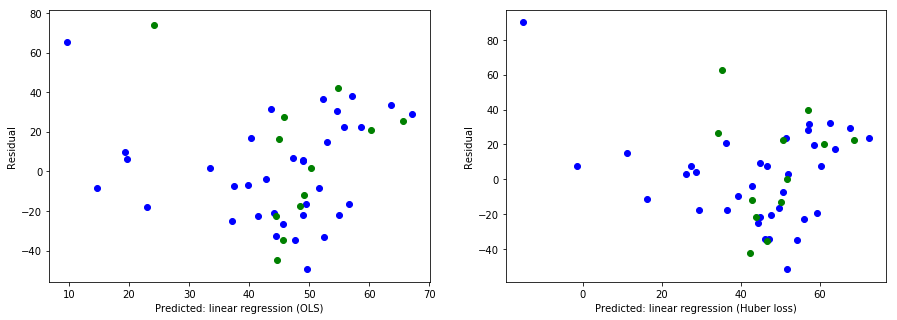

In [23]:
plt.subplots(2,1, figsize=(15,5))
ax1 = plt.subplot(1,2,1)
plt.scatter(lin.predict(X_train), y_train-lin.predict(X_train), label = "MLR", color = "blue")
plt.scatter(lin.predict(X_test), y_test-lin.predict(X_test), label = "MLR", color = "green")
plt.xlabel("Predicted: linear regression (OLS)")
plt.ylabel("Residual")
ax2 = plt.subplot(1,2,2)
plt.scatter(huber.predict(X_train), y_train-huber.predict(X_train), label = "MLR", color = "blue")
plt.scatter(huber.predict(X_test), y_test-huber.predict(X_test), label = "MLR", color = "green")
plt.xlabel("Predicted: linear regression (Huber loss)")
plt.ylabel("Residual")



Given the data set size, Huber behaves only a little better, but in general the plots are pretty comparable. We can see in the residual plots that the Huber one is less effected by the outliers 

In general the Huber loss function makes sure your fit is not heavily influenced by the outliers while not completely ignoring their effect.

# Question 5 - Sampling (4+4=8pts)

1. CBS has come up with an extreme TV show, and each of its viewers either likes or hates it. (no middle ground here; we are in a “black and white age”). CBS wants to estimate what fraction p of its audience like the show by “randomly” calling n viewers and tallying their responses so as to estimate the true value of p to a fractional accuracy of within ±ε%, with a confidence of (1 − α) × 100%. For α = 0.10, ε = 0.03 (i.e. your answer will be pˆ ± 0.03), what is the minimum value of n needed if true value (i) p = 0.5, (ii) p=0.25? 

2. Suppose for a certain value of p and choice of ε, you calculate that you will need 1000 samples for α = 0.02. You now decide to obtain a more accurate answer by either (i) reducing α to 0.01, keeping the same ε or by (ii) reducing ε by a factor of 2 from the original value, and increasing α to 0.05. In each case how many samples would you need now?

## Answer

The key is to realize that the number of people who like the show follows a binomial distribution, which can be approximated by a normal (Gaussian) distribution when $N$ is large. Thus, we can approximate the sample size $n$ as
$$ n \ge p(1-p) \left( \frac{Z_{\alpha/2}}{\epsilon} \right)^2 $$

Here, $z_{\alpha/2}$ = $z_{0.05}$ ≈ 1.645 and $\epsilon$ = 0.03. 
So, (i) $p$ = 0.5, $n$ $\geq$ 752 and (ii) $p$ = 0.75, $n$ $\geq$ 564.

Let $n_1$ represent the original number of samples for $\alpha=0.02$, and the specific choices of $p, \epsilon$ and $n_2$ denote the ``new answer", with $\alpha', \epsilon'$ as potentially altered values.  You can relate $n_2$ to $n_1$ as follows:
\begin{align*}
\frac{n_2}{n_1} &= \frac{p(1-p) \left( \frac{Z_{\alpha'/2}}{\epsilon'} \right)^2} {p(1-p) \left( \frac{Z_{\alpha/2}}{\epsilon} \right)^2} \\
n_2 &= 1000 \frac{ \left( \frac{Z_{\alpha'/2}}{\epsilon'} \right)^2} { \left( \frac{Z_{\alpha/2}}{\epsilon} \right)^2} 
\end{align*}
(i) For $\alpha' =  0.01, \epsilon' = \epsilon$:
\begin{align*}
n = 1000\left(\dfrac{2.58}{2.33}\right)^{2}\approx1231
\end{align*}

(ii) For $\alpha' =  0.05, \epsilon' = \epsilon/2$:
\begin{align*}
n = 1000\left( \frac{1.96}{2.33} \times \frac{\epsilon}{1/2\epsilon}\right)^{2}\approx 2831
\end{align*}

# Question 6 - Principal Component Analysis (10 points)

Import the diabetes dataset as in Q1 and add the interaction variables.
You should have 65 variables and one target variable.

In [18]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(2, include_bias=False).fit_transform(X)

Next, use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to center and scale each feature as follows.

In [19]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
X = stdScaler.fit_transform(X)

(a) Perform PCA using the sklearn [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) package.  Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the principal components of the data (X matrix).  Refer to Figure 10.4 of JW for an example.  You may use the output attribute *explained variance ratio*. (3pts)

(b) How many principal components (N1, N2, N3) are required to explain cumulative variance of 30%, 60%, and 90%, respectively? (3pts)

(c) Fit an ordinary least squares linear regression using N1, N2, and N3 number of principal components, respectively.  Use entire dataset, e.g. 442 rows. Evaluate the models using mean squared error (MSE). (4pts)

## Answer

(a)

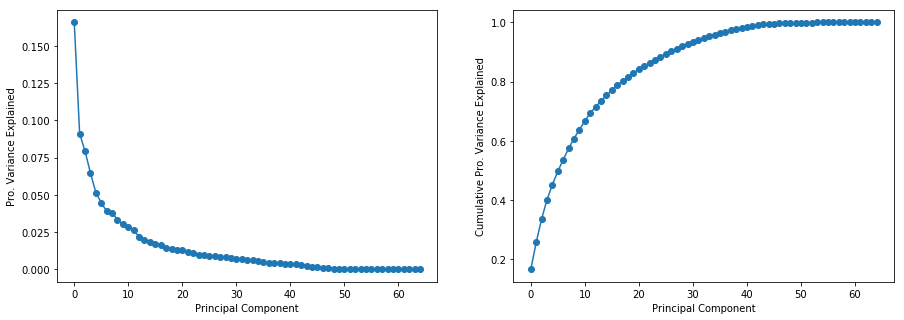

In [20]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import pylab
from sklearn.decomposition import PCA
%matplotlib inline

pca = PCA()
pca.fit(X)

plt.subplots(2,1, figsize=(15,5))
ax1 = plt.subplot(1,2,1)
plt.plot(pca.explained_variance_ratio_, '-o')
plt.xlabel("Principal Component")
plt.ylabel("Pro. Variance Explained")
ax1 = plt.subplot(1,2,2)
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Pro. Variance Explained")

(b)

In [21]:
N1 = np.where(np.cumsum(pca.explained_variance_ratio_)>=0.30)[0][0]+1
N2 = np.where(np.cumsum(pca.explained_variance_ratio_)>=0.60)[0][0]+1
N3 = np.where(np.cumsum(pca.explained_variance_ratio_)>=0.90)[0][0]+1

print('30% of variance explained by {} principal components' .format(N1))
print('60% of variance explained by {} principal components' .format(N2))
print('90% of variance explained by {} principal components' .format(N3))

30% of variance explained by 3 principal components
60% of variance explained by 9 principal components
90% of variance explained by 27 principal components


(c)

In [22]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

mse = []
for n in [N1, N2, N3]:
    pca = decomposition.PCA(n_components=n)
    X_pca = pca.fit_transform(X)

    reg = LinearRegression()
    reg.fit(X_pca,y)

    pred = reg.predict(X_pca)
    mse = mean_squared_error(pred, y)
    print('{} principal components: {}'.format(n, mse))

3 principal components: 5120.605547793726
9 principal components: 3942.7867514263485
27 principal components: 2857.425949000683
